In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
text_data = np.array(['I love Brazil. Brazil!',
'Sweden is best',
'Germany beats both'])
count = CountVectorizer() # BoW 특성 행렬을 만듭니다.
bag_of_words = count.fit_transform(text_data)
bag_of_words # 특성 행렬을 확인

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [2]:
bag_of_words.toarray()
count.get_feature_names() # 특성 이름을 확인
# 옵션을 지정하여 특성 행렬을 만듭니다.
count_2gram = CountVectorizer(ngram_range=(1,2),
stop_words="english",
vocabulary=['brazil'])
bag = count_2gram.fit_transform(text_data)
bag.toarray() # 특성 행렬을 확인
count_2gram.vocabulary_ # 1-그램과 2-그램을 확인
# vocabulary_ : 텍스트 어휘사전에 해당, dict로 저장되어있는 것을 고유한 단어를 추출해서 순서대로 번호를 매긴것
# max_df 매개변수 : 단어가 등장하는 최대갯수를 정해줌
# 어휘 사전의 크기를 제한해야 할 때 : max_features

{'brazil': 0}

In [4]:
import pandas as pd
import numpy as np
time_index = pd.date_range("01/01/2010", periods=5, freq="M")
dataframe = pd.DataFrame(index=time_index) # 데이터프레임을 만들고 인덱스를 지정
dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0] # 누락된 값이 있는 특성을 만듦
dataframe.interpolate() # 누락된 값을 보간

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,3.0
2010-04-30,4.0
2010-05-31,5.0


In [5]:
dataframe.ffill() # 앞쪽으로 채우기(Forward-fill)

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,2.0
2010-04-30,2.0
2010-05-31,5.0


In [6]:
dataframe.bfill() # 뒤쪽으로 채우기(Back-fill)

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,5.0
2010-04-30,5.0
2010-05-31,5.0


In [7]:
dataframe.interpolate(method="quadratic") # 비선형의 경우 보간 방법 변경

,Sales
2010-01-31,1.000000
2010-02-28,2.000000
2010-03-31,3.059808
2010-04-30,4.038069
2010-05-31,5.000000


In [16]:
dataframe.interpolate(limit=1, limit_direction="forward") #보간 방향 지정
# limit =1 : 한개만 보간한다

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,3.0
2010-04-30,NaN
2010-05-31,5.0


In [1]:
import cv2
cv2.__version__ #OpenCV 버전 확인

'4.2.0'

In [ ]:
C:\Users\student\Desktop\123\노소영\새 폴더

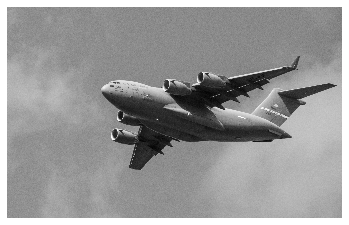

(2270, 3600)

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("./images/plane.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
plt.imshow(image, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()
type(image) # 데이터 타입을 확인
image # 이미지 데이터를 확인
image.shape # 차원을 확인 (해상도)

In [9]:
# 컬러로 이미지를 로드합니다.
image_bgr = cv2.imread("images/plane.jpg", cv2.IMREAD_COLOR)
image_bgr[0,0] # 픽셀을 확인

array([195, 144, 111], dtype=uint8)

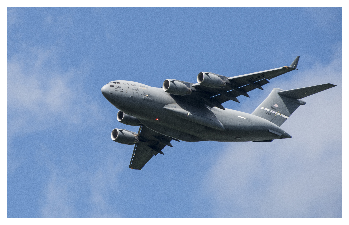

In [14]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # RGB로 변환
plt.imshow(image_rgb), plt.axis("off") # 이미지를 출력
plt.show()

In [15]:
# 이미지 저장
# 흑백으로

import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("./images/plane.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
cv2.imwrite("./images/plane_new.jpg", image) # 이미지를 저장

True

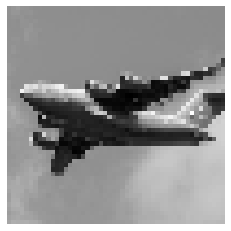

In [18]:
# 이미지 크기 변경

import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
image_50x50 = cv2.resize(image, (50, 50)) # 이미지 크기를 50x50 픽셀로 변경
plt.imshow(image_50x50, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()

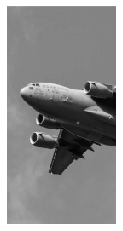

In [19]:
# 이미지 자르기

import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
image_cropped = image[:,:128] # 열의 처음 절반과 모든 행을 선택
plt.imshow(image_cropped, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()

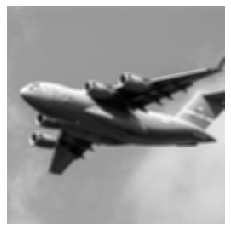

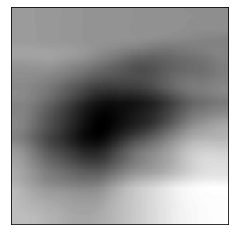

In [20]:
# 이미지 투명도 처리

import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
#각 픽셀 주변의 5X5커널 평균값으로 이미지를 흐리게 합니다.
image_blurry = cv2.blur(image, (5,5))
plt.imshow(image_blurry, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()
# 커널 크기의 영향을 강조하기 위해 100X100 커널로 같은 이미지를 흐리게 합니다.
image_very_blurry = cv2.blur(image, (100,100))
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지를 출력
plt.show()

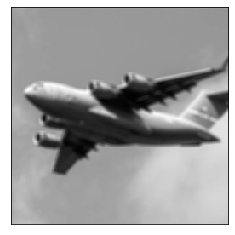

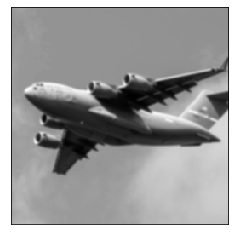

In [21]:
kernel = np.ones((5,5)) / 25.0 # 커널을 만듭니다.
kernel # 커널을 확인
image_kernel = cv2.filter2D(image, -1, kernel) # 커널을 적용
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

image_very_blurry = cv2.GaussianBlur(image, (5,5), 0) # 가우시안 블러를 적용
                                                      # x축 방향의 표준편차
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

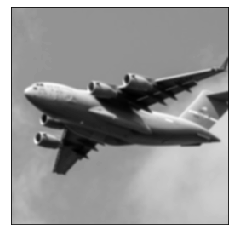

In [22]:
gaus_vector = cv2.getGaussianKernel(5, 0)
gaus_vector
gaus_kernel = np.outer(gaus_vector, gaus_vector) # 벡터를 외적하여 커널을 만듭니다.
gaus_kernel
# filter2D()로 커널을 이미지에 직접 적용하여 비슷한 흐림 효과를 만들 수 있습니다.
image_kernel = cv2.filter2D(image, -1, gaus_kernel) # 커널을 적용
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

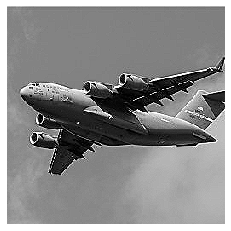

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
kernel = np.array([[0, -1, 0],
[-1, 5,-1],
[0, -1, 0]]) # 커널을 만듭니다.
# 이미지를 선명하게 만듭니다.
image_sharp = cv2.filter2D(image, -1, kernel)
plt.imshow(image_sharp, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

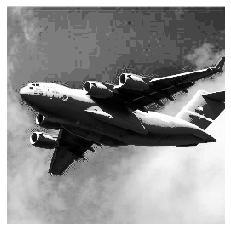

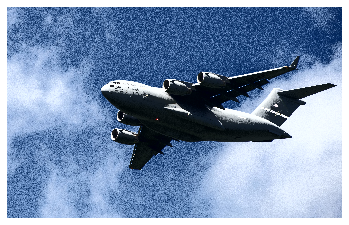

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
image_enhanced = cv2.equalizeHist(image) # 이미지 대비를 향상시킵니다.
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()
image_bgr = cv2.imread("images/plane.jpg") # 이미지 로드
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB) # RGB로 바꿉니다.
plt.imshow(image_rgb), plt.axis("off") # 이미지 출력
plt.show()

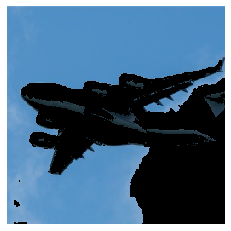

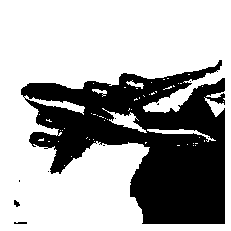

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_bgr = cv2.imread('images/plane_256x256.jpg') # 이미지 로드
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV) # BGR에서 HSV로 변환
lower_blue = np.array([50,100,50]) # HSV에서 파랑 값의 범위를 정의
upper_blue = np.array([130,255,255])
mask = cv2.inRange(image_hsv, lower_blue, upper_blue) # 마스크를 만듭니다.
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask) # 이미지에 마스크를 적용
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB) # BGR에서 RGB로 변환
plt.imshow(image_rgb), plt.axis("off") # 이미지를 출력
plt.show()
plt.imshow(mask, cmap='gray'), plt.axis("off") # 마스크 출력
plt.show()

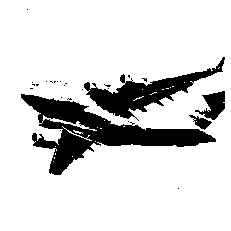

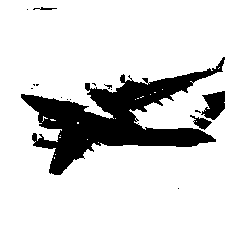

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_grey = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey, max_output_value,
cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
neighborhood_size, subtract_from_mean) # 적응적 임계처리를 적용
plt.imshow(image_binarized, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()


# cv2.ADAPTIVE_THRESH_MEAN_C를 적용합니다.
image_mean_threshold = cv2.adaptiveThreshold(image_grey,
max_output_value,
cv2.ADAPTIVE_THRESH_MEAN_C,
cv2.THRESH_BINARY,
neighborhood_size,
subtract_from_mean)

plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()

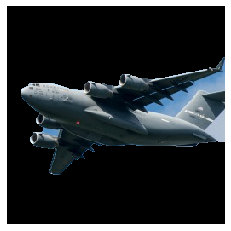

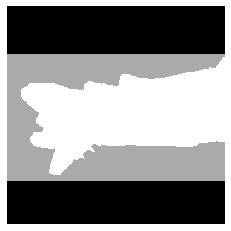

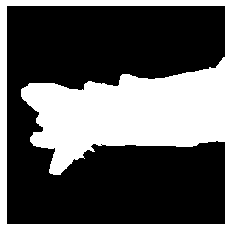

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr = cv2.imread('images/plane_256x256.jpg') # 이미지 로드
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # RGB로 변환

rectangle = (0, 56, 256, 150) # 사각형 좌표: 시작점의 x, 시작점의 y, 너비, 높이

mask = np.zeros(image_rgb.shape[:2], np.uint8) # 초기 마스크를 만듭니다.

bgdModel = np.zeros((1, 65), np.float64) # grabCut에 사용할 임시 배열을 만듭니다.
fgdModel = np.zeros((1, 65), np.float64)


# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
mask, # 마스크
rectangle, # 사각형
bgdModel, # 배경을 위한 임시 배열
fgdModel, # 전경을 위한 임시 배열
5, # 반복 횟수
cv2.GC_INIT_WITH_RECT) # 사각형을 사용한 초기화
# 배경인 곳은 0, 그외에는 1로 설정한 마스크를 만듭니다.
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
# 이미지에 새로운 마스크를 곱해 배경을 제외합니다.
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
plt.imshow(image_rgb_nobg), plt.axis("off") # 이미지 출력
plt.show()

plt.imshow(mask, cmap='gray'), plt.axis("off") # 마스크 출력
plt.show()

plt.imshow(mask_2, cmap='gray'), plt.axis("off") # 마스크 출력
plt.show()

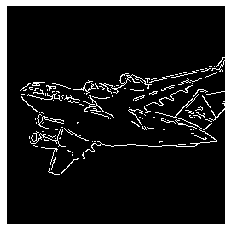

In [31]:
#경계선 감지

import cv2
import numpy as np
from matplotlib import pyplot as plt
image_gray = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
median_intensity = np.median(image_gray) # 픽셀 강도의 중간값을 계산
# 중간 픽셀 강도에서 위아래 1 표준 편차 떨어진 값을 임계값으로 지정합니다.
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
# 캐니 경계선 감지기를 적용합니다.
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
plt.imshow(image_canny, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

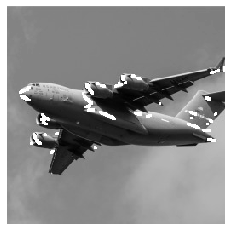

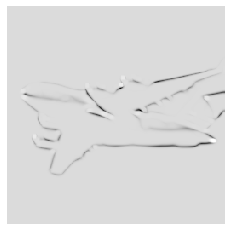

In [32]:
# 모서리 감지

import cv2
import numpy as np
from matplotlib import pyplot as plt
image_bgr = cv2.imread("images/plane_256x256.jpg") # 흑백 이미지 로드
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)
block_size = 2 # 모서리 감지 매개변수를 설정
aperture = 29
free_parameter = 0.04

detector_responses = cv2.cornerHarris(image_gray,
block_size,
aperture,
free_parameter) # 모서리를 감지
detector_responses = cv2.dilate(detector_responses, None) # 모서리 표시를 부각시킵니다.
# 임계값보다 큰 감지 결과만 남기고 흰색으로 표시합니다.
threshold = 0.02
image_bgr[detector_responses >
threshold *
detector_responses.max()] = [255,255,255]
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY) # 흑백으로 변환
plt.imshow(image_gray, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()
# 가능성이 높은 모서리를 출력합니다.
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

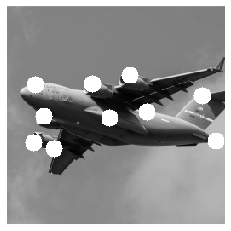

In [34]:
image_bgr = cv2.imread('images/plane_256x256.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
# 감지할 모서리 개수
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25
corners = cv2.goodFeaturesToTrack(image_gray,
corners_to_detect,
minimum_quality_score,
minimum_distance) # 모서리를 감지
corners = np.float32(corners)
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1) # 모서리마다 흰 원을 그립니다.
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY) # 흑백 이미지로 변환
plt.imshow(image_rgb, cmap='gray'), plt.axis("off") # 이미지를 출력
plt.show()

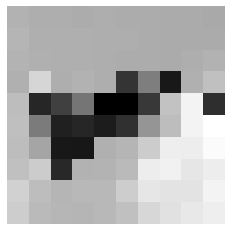

(100,)

In [35]:
# 머신러닝 특성 만들기

import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
image_10x10 = cv2.resize(image, (10, 10)) # 이미지를 10x10 픽셀 크기로 변환
image_10x10.flatten() # 이미지 데이터를 1차원 벡터로 변환
plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()
image_10x10.shape
image_10x10.flatten().shape

In [39]:
image_color = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_COLOR) # 컬러 이미지로 로드
image_color_10x10 = cv2.resize(image_color, (10, 10)) # 이미지를 10 × 10 픽셀 크기로 변환
image_color_10x10.flatten().shape # 이미지 데이터를 1차원 벡터로 변환하고 차원을 출력

(300,)

In [40]:
image_256x256_gray = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
image_256x256_gray.flatten().shape # 이미지 데이터를 1차원 벡터로 변환하고 차원을 출력

(65536,)

In [41]:
image_256x256_color = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_COLOR) # 컬러 이미지로 로드
image_256x256_color.flatten().shape # 이미지 데이터를 1차원 벡터로 변환하고 차원을 출력

(196608,)

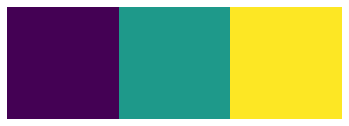

In [42]:
# 평균 색을 특성으로 인코딩
#  이미지의 각 픽셀은 여러 컬러 채널(빨간, 초록, 파랑)의 조합으로 표현되며, 채널의 평균값을 계산하여 이미지의
# 평균 컬러를 나타내는 세 개의 컬럼 특성을 만듭니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt
# BGR 이미지로 로드
image_bgr = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_COLOR)
channels = cv2.mean(image_bgr) # 각 채널의 평균을 계산
# 파랑과 빨강을 바꿉니다(BGR에서 RGB로 만듭니다)
observation = np.array([(channels[2], channels[1], channels[0])])
observation # 채널 평균 값을 확인
plt.imshow(observation), plt.axis("off") # 이미지를 출력
plt.show()

In [46]:
#  컬러 히스토그램을 특성으로 인코딩
#  이미지의 각 픽셀은 여러 컬러 채널(빨간, 초록, 파랑)의 조합으로 표현되며, 채널의 평균값을 계산하여 이미지의
# 평균 컬러를 나타내는 세 개의 컬럼 특성을 만듭니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)# RGB로 변환
features = [] # 특성 값을 담을 리스트
colors = ("r","g","b") # 각 컬러 채널에 대해 히스토그램을 계산

# 각 채널을 반복하면서 히스토그램을 계산하고 리스트에 추가
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # 이미지
                            [i], # 채널 인덱스
                            None, # 마스크 없음
                            [256], # 히스토그램 크기
                            [0,256]) # 범위
    features.extend(histogram)
observation = np.array(features).flatten() # 샘플의 특성 값으로 벡터를 만듭니다.
observation[0:5] # 처음 다섯 개의 특성을 출력


array([1027.,  217.,  182.,  146.,  146.], dtype=float32)

In [47]:
image_rgb[0,0] # RGB 채널 값을 확인

array([107, 163, 212], dtype=uint8)

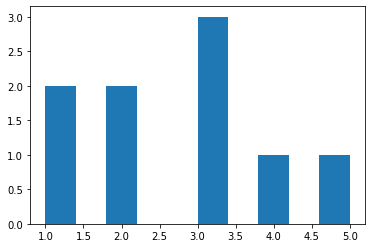

In [48]:
import pandas as pd

data = pd.Series([1, 1, 2, 2, 3, 3, 3, 4, 5]) # 예시 데이터
data.hist(grid=False) # 히스토그램을 출력
plt.show()

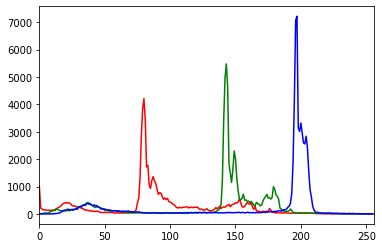

In [49]:
colors = ("r","g","b") # 각 컬러 채널에 대한 히스토그램을 계산
# 컬러 채널을 반복하면서 히스토그램을 계산하고 그래프를 그립니다.
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # 이미지
                            [i], # 채널 인덱스
                            None, # 마스크 없음
                            [256], # 히스토그램 크기
                            [0,256]) # 범위
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])

plt.show() # 그래프를 출력